### **Importing Data and Understanding**

In [2]:
# Uploading csv file
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS (1).csv


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Exporting csv file to pandas dataframe
iris  = pd.read_csv('IRIS.csv')

In [41]:
# Data Overview
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
# No of Null Values column wise
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [43]:
# Overall Info of iris data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
# Statistical characters of iris dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Exploratory Data Analysis**

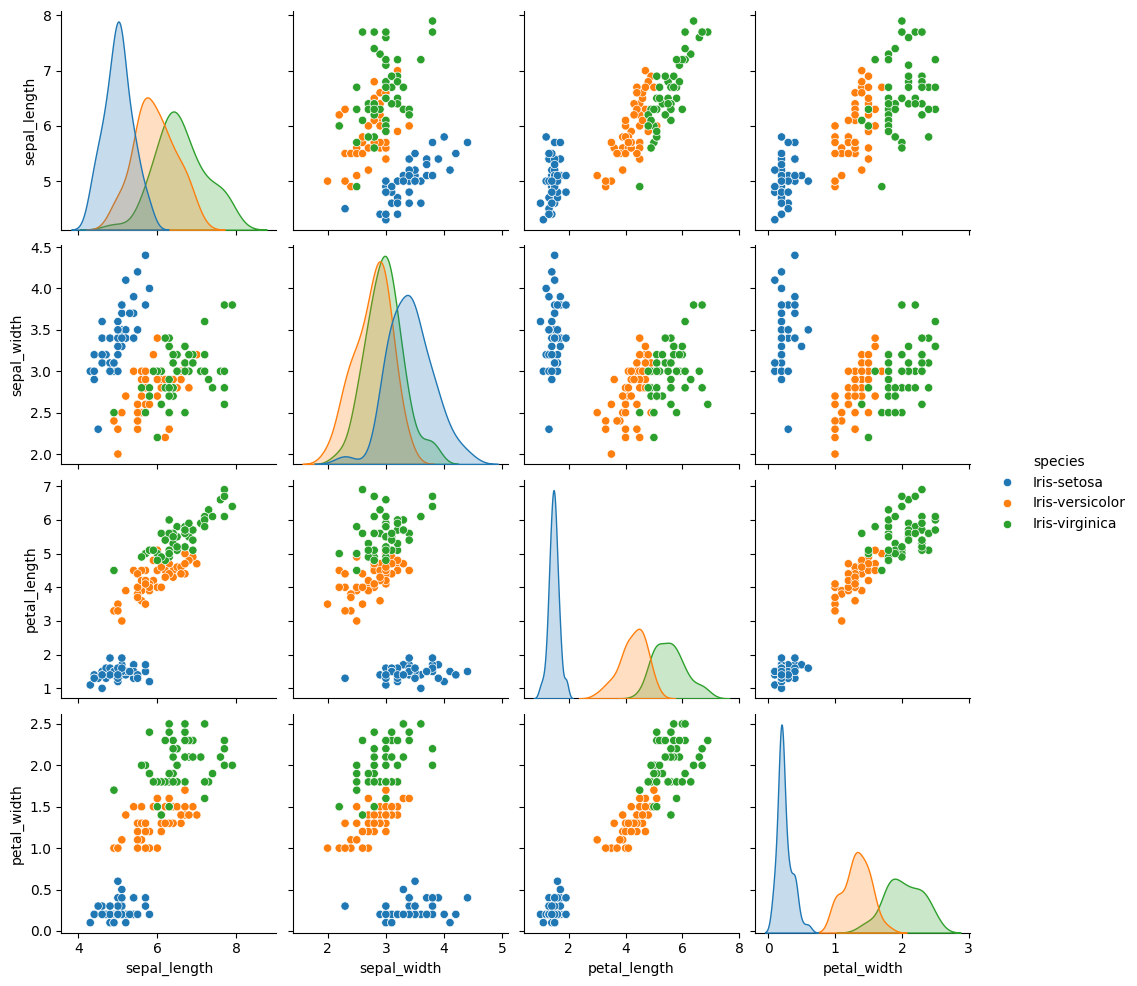

In [45]:
# Pair Plotting as per species
pairplot = sns.pairplot(iris, hue='species')

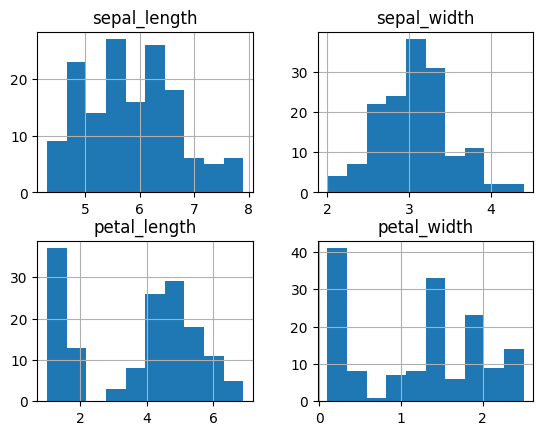

In [46]:
# Distribution of values in column wise
histogram = iris.hist()

<Axes: >

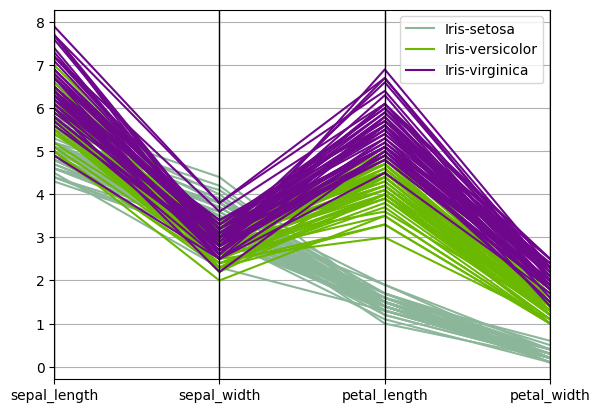

In [47]:
# Features analysis of iris dataset
pd.plotting.parallel_coordinates( frame = iris,class_column = 'species')

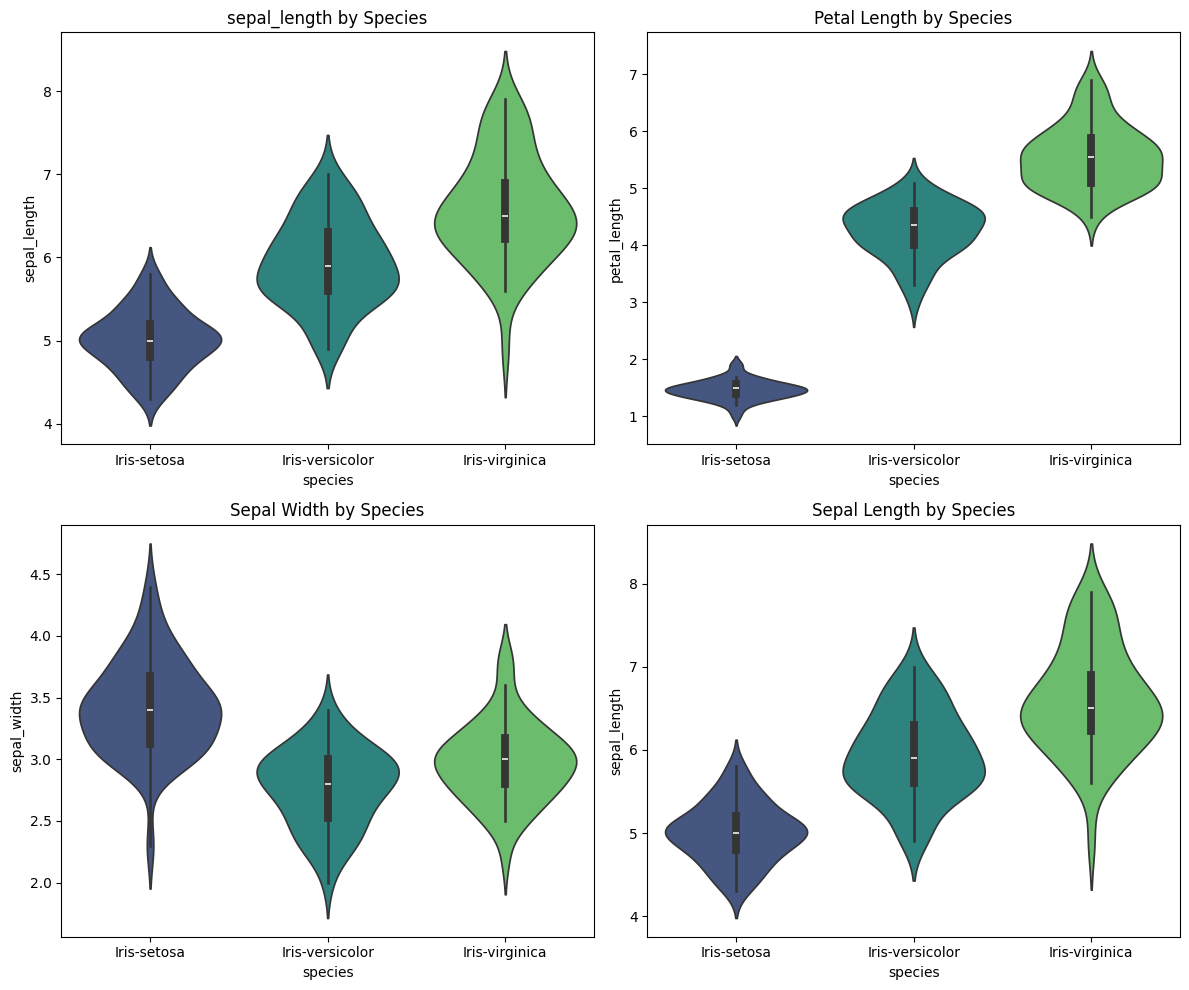

In [48]:
# Distribution of features values - species wise
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Violin plots for each feature by species
sns.violinplot(x='species', y='sepal_length', data=iris, ax=axes[0, 0], hue='species', palette="viridis", legend=False)
axes[0, 0].set_title("sepal_length by Species")

sns.violinplot(x='species', y='petal_length', data=iris, ax=axes[0, 1], hue='species', palette="viridis", legend=False)
axes[0, 1].set_title("Petal Length by Species")

sns.violinplot(x='species', y='sepal_width', data=iris, ax=axes[1, 0], hue='species', palette="viridis", legend=False)
axes[1, 0].set_title("Sepal Width by Species")

sns.violinplot(x='species', y='sepal_length', data=iris, ax=axes[1, 1], hue='species', palette="viridis", legend=False)
axes[1, 1].set_title("Sepal Length by Species")

plt.tight_layout()
plt.show()



<ipython-input-49-7696a722b379>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris, palette=['red', 'green', 'blue'])


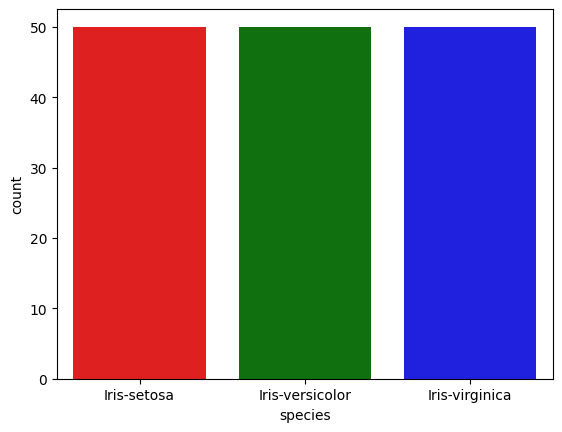

In [49]:
# No of species in each catagory

sns.countplot(x='species', data=iris, palette=['red', 'green', 'blue'])
plt.show()

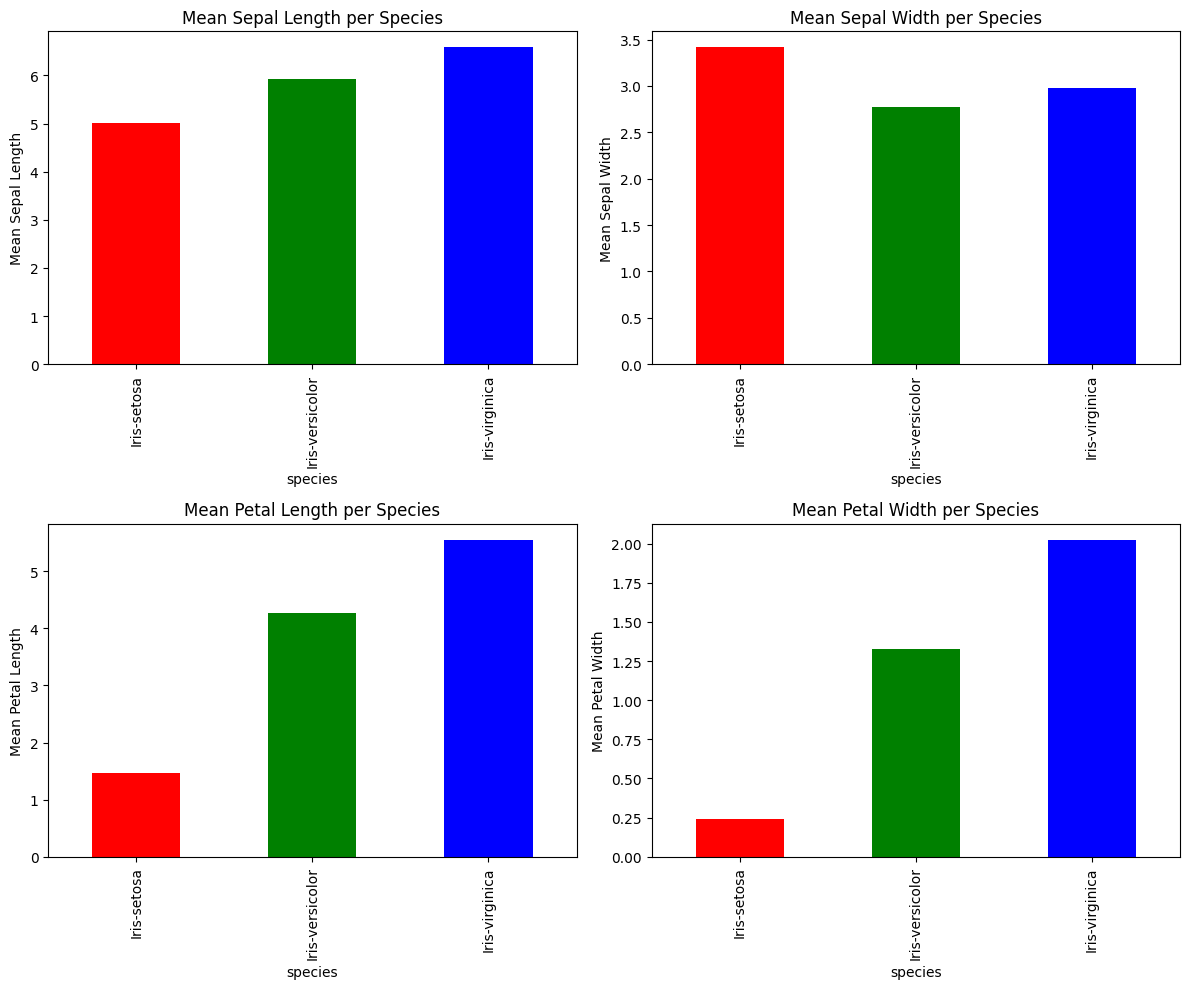

In [50]:
# Plotting mean values for each feature per species
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sepal Length
iris.groupby('species')['sepal_length'].mean().plot(kind='bar', color=['red', 'green', 'blue'], ax=axes[0, 0])
axes[0, 0].set_ylabel('Mean Sepal Length')
axes[0, 0].set_title('Mean Sepal Length per Species')

# Sepal Width
iris.groupby('species')['sepal_width'].mean().plot(kind='bar', color=['red', 'green', 'blue'], ax=axes[0, 1])
axes[0, 1].set_ylabel('Mean Sepal Width')
axes[0, 1].set_title('Mean Sepal Width per Species')

# Petal Length
iris.groupby('species')['petal_length'].mean().plot(kind='bar', color=['red', 'green', 'blue'], ax=axes[1, 0])
axes[1, 0].set_ylabel('Mean Petal Length')
axes[1, 0].set_title('Mean Petal Length per Species')

# Petal Width
iris.groupby('species')['petal_width'].mean().plot(kind='bar', color=['red', 'green', 'blue'], ax=axes[1, 1])
axes[1, 1].set_ylabel('Mean Petal Width')
axes[1, 1].set_title('Mean Petal Width per Species')

plt.tight_layout()
plt.show()


In [51]:
# Converting species catogorical to numerica

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris['species'] = le.fit_transform(iris['species'])


<Axes: >

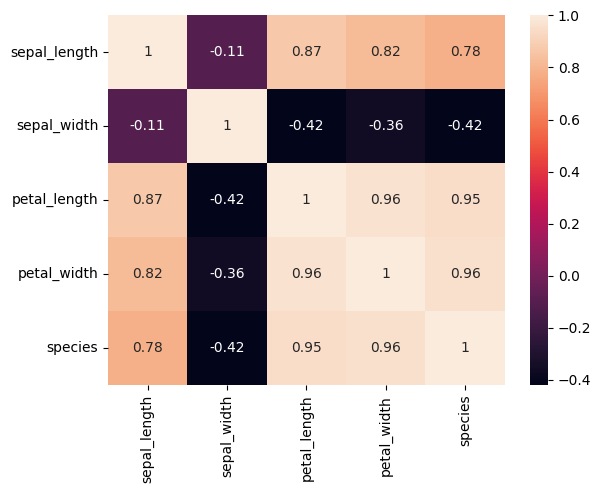

In [52]:
# Plotting Heat map
sns.heatmap(iris.corr(), annot=True)

### **Data Pre-Processing**

In [53]:
x = iris.drop('species', axis=1)
y = iris['species']

In [54]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
# Standardization of numerical values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

x_scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [56]:
# Train test split of data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

## **Model Training**

### knn classification model

In [57]:
# KNN classification model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

# Predictions on the test set
y_pred = knn.predict(x_test)

# Accuracy on predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [58]:
# Classification report of predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



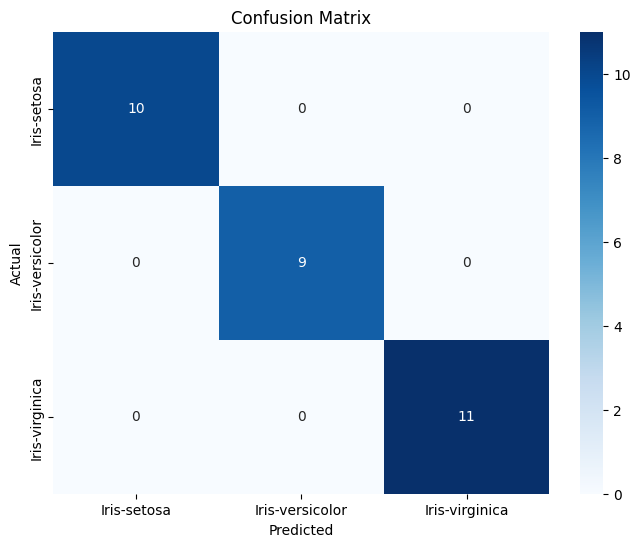

In [59]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes model classification

In [60]:
# Naive Bayes model classification

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gnb = GaussianNB()

gnb.fit(x_train, y_train)

# Predictions on the test set
y_pred_gnb = gnb.predict(x_test)

# Accuracy on predictions
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Naive Bayes Accuracy: {accuracy_gnb}")

Naive Bayes Accuracy: 1.0


In [61]:
# Classification Report on predictions
print(classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



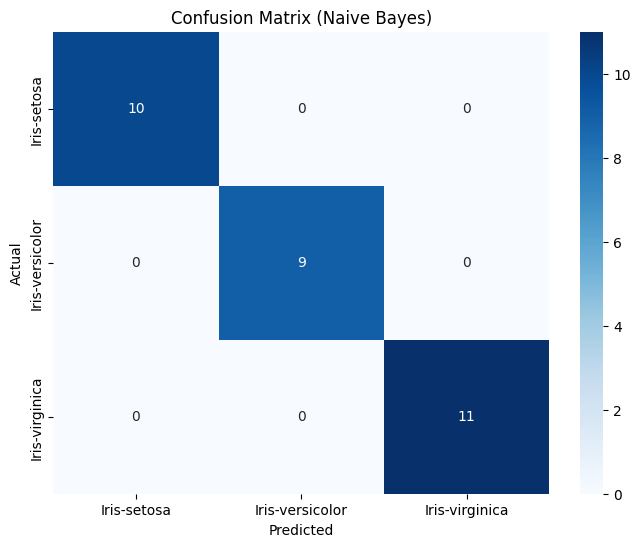

In [62]:
# Confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()

### Decision trees classification model

In [63]:
# Decision trees classification model

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(x_train, y_train)

# Predictions on the test set
y_pred_dt = dt_classifier.predict(x_test)

# Accuracy on predictions
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 1.0


In [64]:
# Classification report of predictions
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



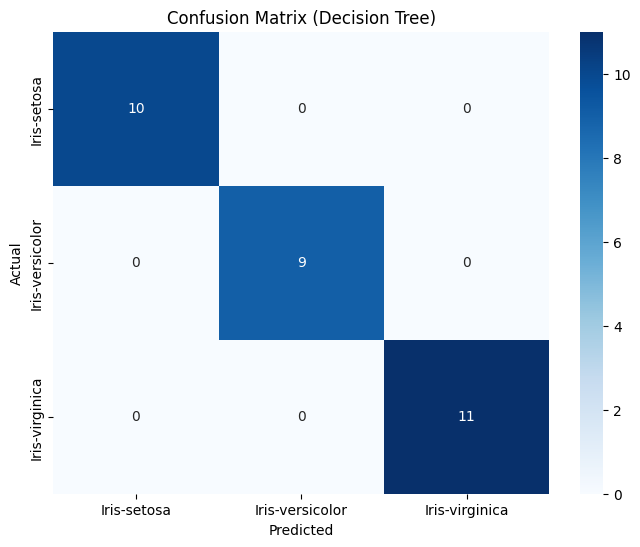

In [65]:
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()